<a href="https://colab.research.google.com/github/JS555555/spam_detection/blob/main/spam_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
df = pd.read_csv('/data.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
labels, data = df['v1'], df['v2']
labels = labels.map({'ham': 0, 'spam': 1})

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

In [ ]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
word_to_index = tokenizer.word_index
V = len(word_to_index)
print(f'num of unique tokens: {V}')

num of unique tokens: 7584


In [ ]:
data_train = pad_sequences(sequences_train)
sequence_len = data_train.shape[1]
data_test = pad_sequences(sequences_test, maxlen=sequence_len)

In [ ]:
# model

D = 30

i = Input(shape=(sequence_len,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(data_train, y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
131/131 [==============================] - 4s 18ms/step - loss: 0.4143 - accuracy: 0.8557 - val_loss: 0.3041 - val_accuracy: 0.8629
Epoch 2/10
131/131 [==============================] - 3s 21ms/step - loss: 0.1289 - accuracy: 0.9442 - val_loss: 0.0758 - val_accuracy: 0.9785
Epoch 3/10
131/131 [==============================] - 4s 27ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0625 - val_accuracy: 0.9835
Epoch 4/10
131/131 [==============================] - 2s 16ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0596 - val_accuracy: 0.9864
Epoch 5/10
131/131 [==============================] - 2s 17ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0575 - val_accuracy: 0.9856
Epoch 6/10
131/131 [==============================] - 2s 17ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0566 - val_accuracy: 0.9842
Epoch 7/10
131/131 [==============================] - 2s 17ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0623 - val_accuracy: 0.9849

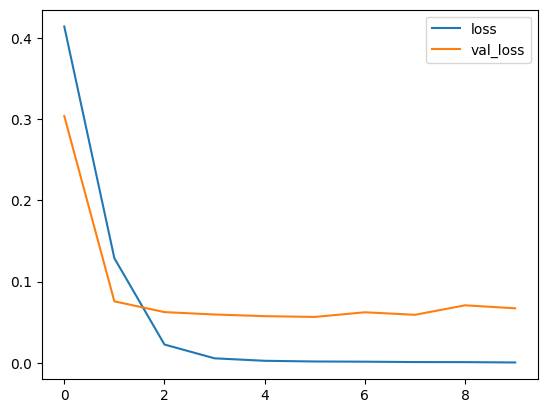

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

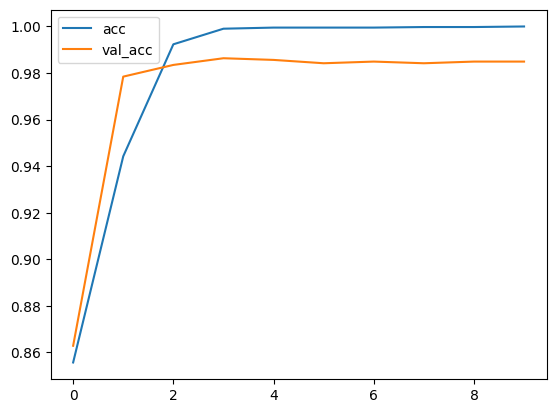

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()